# Measure contextual morphometric characters

Computational notebook 07 for _NAME_ Dal Cin, Fleischmann.. - ADD Reference.

Contact: martin@martinfleischmann.net

Date: 27/03/2020

---

This notebook plots flood risk data based on the data from previous notebooks.

In [17]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import husl
import matplotlib
import matplotlib.pyplot as plt

In [26]:
pd.__version__, gpd.__version__, matplotlib.__version__, sns.__version__, husl.__version__

('1.0.3', '0.7.0', '3.2.1', '0.10.0', '4.0.3')

In [2]:
path = 'data/waterrelation_data.csv'

In [8]:
data = pd.read_csv(path, index_col=0)

In [12]:
clusters = gpd.read_file('data/points.gpkg', layer='ward')

In [13]:
clusters = clusters.set_index('index')

In [14]:
clusters['flooded_perc'] = data.flooded_perc

In [15]:
mapping = {'aguda':17, 'albufeira':8, 'armacao':15, 'azenhas':22, 'cascais':6, 'costa_caparica':13,
       'costa_nova':32, 'ericeira':9, 'espinho':35, 'esposende':23, 'faro':12,
       'figueira_foz1':7, 'figueira_foz2':19, 'figueira_foz3':16, 'foradouro':34, 'foz':18,
       'monte_gordo':3, 'nazare1':29, 'nazare2':2, 'olhao':11, 'palheiros1':31,
       'palheiros2':25, 'palheiros3':24, 'pedrogao':4, 'povoa':36, 'praia_corvoeiro':21,
       'praia_mira':20, 'quaios':30, 'quarteira':1, 'sao_martinho':14, 'sesimbra':28,
       'vieira1':27, 'vieira2':5, 'vila_do_conde':33, 'vila_praia':10, 'zambujeira':26}
clusters['order'] = clusters.index.map(mapping)

Text(0, 0.5, 'flooded area (2050)')

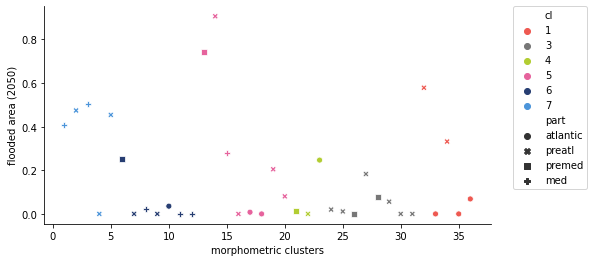

In [18]:
colors = [(246, 79, 60), (257, 71, 27), (347, 72, 60), (98, 93, 78), (26, 0, 50), (14, 79, 58)]
qualitative = sns.color_palette([husl.husl_to_hex(*x) for x in reversed(colors)])

fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x='order', y='flooded_perc', data=clusters, hue='cl', style='part',
              palette=qualitative, ax=ax)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('morphometric clusters')
plt.ylabel('flooded area (2050)')

In [19]:
wind = pd.read_csv('data/wind_relation.csv', index_col=0)

In [20]:
wind.set_index('place', inplace=True)

In [21]:
clusters = clusters.merge(wind, how='left', left_index=True, right_index=True)

In [23]:
clusters.loc['palheiros1', 'winddev'] = wind.loc['palheiros', 'winddev']
clusters.loc['palheiros2', 'winddev'] = wind.loc['palheiros', 'winddev']
clusters.loc['palheiros3', 'winddev'] = wind.loc['palheiros', 'winddev']
clusters.loc['figueira_foz1', 'winddev'] = wind.loc['figueira_foz', 'winddev']
clusters.loc['figueira_foz2', 'winddev'] = wind.loc['figueira_foz', 'winddev']
clusters.loc['figueira_foz3', 'winddev'] = wind.loc['figueira_foz', 'winddev']
clusters.loc['vieira1', 'winddev'] = wind.loc['vieira', 'winddev']
clusters.loc['vieira2', 'winddev'] = wind.loc['vieira', 'winddev']
clusters.loc['nazare1', 'winddev'] = wind.loc['nazare', 'winddev']
clusters.loc['nazare1', 'winddev'] = wind.loc['nazare', 'winddev']

Text(0, 0.5, 'deviation of orientation from SW wind')

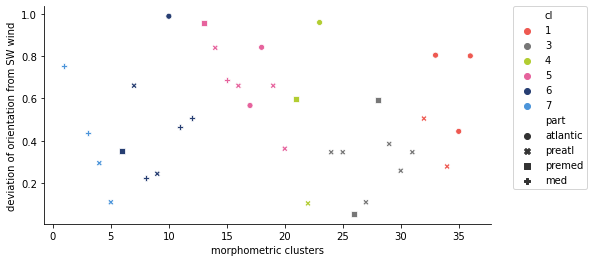

In [24]:
colors = [(246, 79, 60), (257, 71, 27), (347, 72, 60), (98, 93, 78), (26, 0, 50), (14, 79, 58)]
qualitative = sns.color_palette([husl.husl_to_hex(*x) for x in reversed(colors)])

fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x='order', y='winddev', data=clusters, hue='cl', style='part',
              palette=qualitative, ax=ax)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('morphometric clusters')
plt.ylabel('deviation of orientation from SW wind')

Text(0, 0.5, 'combined risk')

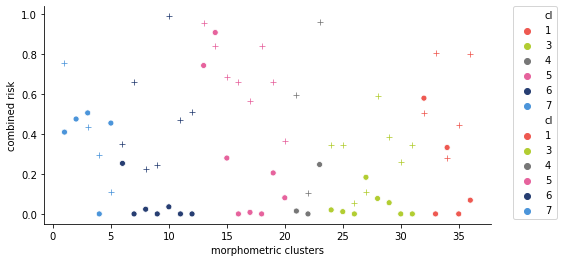

In [25]:
colors = [(246, 79, 60), (257, 71, 27), (347, 72, 60), (26, 0, 50), (98, 93, 78), (14, 79, 58)]
qualitative = sns.color_palette([husl.husl_to_hex(*x) for x in reversed(colors)])

fig, ax = plt.subplots(figsize=(8, 4))
sns.scatterplot(x='order', y='flooded_perc', data=clusters, hue='cl', marker='o',
              palette=qualitative, ax=ax)
sns.scatterplot(x='order', y='winddev', data=clusters, hue='cl', marker='+',
              palette=qualitative, ax=ax)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('morphometric clusters')
plt.ylabel('combined risk')